## **Bootcamp: Ciencia de Datos e Inteligencia Artificial**
## **Proyecto del Módulo 6: Procesamiento de Lenguaje Natural**
¡Hola, qué gusto que estés a un paso de obtener tu insignia del módulo 6! Aquí pondrás en juego las habilidades y conocimientos que has practicado a lo largo de estas semanas.

Lee el proyecto y revisa con cuidado cada una de las instrucciones. Procura plasmar todo tu potencial para que concluyas tu proyecto de manera exitosa.

¡Éxito!

# Objetivos
- Aplicar el análisis de sentimientos a datos de la vida real.
- Realizar la recolección y análisis de sentimientos con las herramientas de Python.
- Generar diferentes gráficas que ayuden a entender los sentimientos generales del _dataset_.

## Proyecto
Usarás el _dataset_ -> https://www.kaggle.com/datasets/kazanova/sentiment140, que tiene más de 1.6 millones de tuits extraídos con la API de Twitter, para realizar lo siguiente:


1. Hacer todo el preprocesamiento de datos, que incluye:
  - Quitar valores nulos
  - Remover los URL de los tuits
  - Remover números
  - Quitar signos de puntuación
  - Eliminar las palabras de parada

2. Generar una gráfica y una nube de palabras de acuerdo con el _target_ del tuit.

3. Realizar la vectorización de los textos y justificar la elección del vectorizador y optimizador.

4. Entrenar un modelo de clasificación, graficar la matriz de confusión, imprimir la precisión y hacer una prueba con un texto que tú escribas.
  - Puedes seleccionar el vectorizador y los optimizadores de tu preferencia.

5. Entrenar el modelo con un segundo algoritmo de clasificación de tu elección y **escribir** las conclusiones de tus resultados.

  - Debes graficar la matriz de confusión, imprimir la precisión y hacer una prueba en un texto con el nuevo modelo.

**NOTA:** Puedes reducir el tamaño del _dataset_ según tu criterio, con el fin de reducir el tiempo de ejecución o evitar que el COLAB se detenga debido al consumo de RAM.

Mucho éxito y recuerda que en las asesorías semanales e individuales tu _coach_ te ayudará con el proyecto.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones |
| -- | -- | -- |
| Actividad 1. Limpieza | 20 | Realiza las siguientes actividades en el _dataset_: quitar valores nulos. Remover las URL de los tuits. Remover números. Quitar signos de puntuación. Eliminar las palabras de parada.|
| Actividad 2. Análisis inicial | 20 | Debes generar una gráfica con leyendas y títulos adecuados para ser leídos por una persona que no sea del área. Además, debes realizar una nube de palabras por cada sentimiento _target_ que tiene el _dataset_.
| Actividad 3. Vectorización | 20 | Para entrenar el modelo de ML, el texto debe estar vectorizado, por ello, debes realizar la vectorización y justificar tus elecciones. Sin las justificaciones, se descontarán puntos. |
| Actividad 4. Entrenamiento 1 | 20 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |
| Actividad 5. Entrenamiento 2 | 20 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |


###Desarrollo

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
#Importamos las librerias a utilizar

import pandas as pd
import numpy as np

#Generacion de graficas
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import gensim
from gensim.models import Word2Vec
from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [32]:
#Importamos el DataFrame autilizar en el modelo de entrenamiento
path = "/content/drive/MyDrive/Colab Notebooks/Modulo 6/Proyecto 6/training.1600000.processed.noemoticon.csv"
columnas = ["target", "id", "date", "flag", "user", "text"] # nombramos las columnas, debido a que el df, carece de esta especificacion
df = pd.read_csv(path, encoding="latin-1", names= columnas, nrows= 100000, skiprows=750000) # se traen 100000 ejemplos empezando desde la fila 750000, de esta manera se traen 50000 tweets postivivos y 50000 negativos

In [33]:
df

target          id                          date      flag  \
0           0  2285370474  Mon Jun 22 15:02:48 PDT 2009  NO_QUERY   
1           0  2285370823  Mon Jun 22 15:02:49 PDT 2009  NO_QUERY   
2           0  2285371185  Mon Jun 22 15:02:51 PDT 2009  NO_QUERY   
3           0  2285371495  Mon Jun 22 15:02:52 PDT 2009  NO_QUERY   
4           0  2285371762  Mon Jun 22 15:02:54 PDT 2009  NO_QUERY   
...       ...         ...                           ...       ...   
99995       4  1565294606  Mon Apr 20 06:24:26 PDT 2009  NO_QUERY   
99996       4  1565294669  Mon Apr 20 06:24:27 PDT 2009  NO_QUERY   
99997       4  1565294684  Mon Apr 20 06:24:28 PDT 2009  NO_QUERY   
99998       4  1565294704  Mon Apr 20 06:24:28 PDT 2009  NO_QUERY   
99999       4  1565294736  Mon Apr 20 06:24:29 PDT 2009  NO_QUERY   

                  user                                               text  
0              idmoore  @Opotopo small slip on Tryfan few weeks back, ...  
1      xbeautifulmessx  @Idristwilight You can post HAN when you want....  
2        thefirstsight  @rose_7 Ohh poor jan  please tell her that if ...  
3            Sarah2713  Finally home from work...It was a looong day!!...  
4        dierockerfrau                   im very sad 4 chantelle and tom   
...                ...                                                ...  
99995   COSMOSCreative  Now need 8 followers to compleate 1000  Follow...  
99996       klaraflame  I knew I had to explain something to my friend...  
99997      johamcoloma                 done tweeting..... til tomorrow..   
99998    CanadianOpera  @cmozilo Act II set is pretty breath-taking -L...  
99999      faerietalez  if you don't have an artfire account to sell y...  

[100000 rows x 6 columns]

In [34]:
#se revisan diferentes tweets
df["text"][0]

'@Opotopo small slip on Tryfan few weeks back, felt side pull but didnt think it was bad. Muscle went between ribs. Did me for 2 weeks '

In [35]:
df["text"][1000]

'Crud, I just realized that the lipstick I bought has two parabens in it - got past my in-store read. '

In [36]:
df["text"][50000]

'I LOVE @Health4UandPets u guys r the best!! '

In [37]:
df["text"][80000]

'Another great F1 race this morning  Congrats to Vettel and Red Bull. Also well done to Adrian Newey: 3 cars he designed in the top 8 today'

In [38]:
#Se revisa su informacion general y completitud y duplicados
duplicados = df.duplicated(subset="text") # buscaremos especificamente en text ya que es la fila que usaremos para entrenar el modelo
print("\n", df.info()) # se revisa informacion general del df, tipos de datos, cantidad de registros.
print("\nLos valores de completitud en % de las columnas son:\n\n", str((df.notnull().sum()/df.shape[0])*100)) # se revisa la completitud de las columnas
print("\nLa cantidad de filas duplicadas son:", str((duplicados.sum()))) # y el numero de duplicados, especificamente en la columna text que es la que usaremos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   target  100000 non-null  int64 
 1   id      100000 non-null  int64 
 2   date    100000 non-null  object
 3   flag    100000 non-null  object
 4   user    100000 non-null  object
 5   text    100000 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.6+ MB

 None

Los valores de completitud en % de las columnas son:

 target    100.0
id        100.0
date      100.0
flag      100.0
user      100.0
text      100.0
dtype: float64

La cantidad de filas duplicadas son: 496


Considerando los valores anteriores, al no tener valores nulos no es necesario eliminarlo, por lo que se precede a eliminar columnas que no serian utilizadas por que no usaremos esa informacion para el analisis de sentimiento.
Tambien se revisara los duplicados de la columna text.

In [39]:
df[duplicados].head(20)

target          id                          date      flag  \
520        0  2285694009  Mon Jun 22 15:27:31 PDT 2009  NO_QUERY   
634        0  2285733003  Mon Jun 22 15:30:33 PDT 2009  NO_QUERY   
1219       0  2285999179  Mon Jun 22 15:51:47 PDT 2009  NO_QUERY   
2028       0  2286318906  Mon Jun 22 16:17:01 PDT 2009  NO_QUERY   
2613       0  2286574858  Mon Jun 22 16:38:00 PDT 2009  NO_QUERY   
3007       0  2286731955  Mon Jun 22 16:50:56 PDT 2009  NO_QUERY   
3898       0  2287044100  Mon Jun 22 17:16:27 PDT 2009  NO_QUERY   
4808       0  2288116585  Mon Jun 22 18:44:26 PDT 2009  NO_QUERY   
4811       0  2288116649  Mon Jun 22 18:44:26 PDT 2009  NO_QUERY   
4833       0  2288118915  Mon Jun 22 18:44:37 PDT 2009  NO_QUERY   
5671       0  2288402622  Mon Jun 22 19:06:57 PDT 2009  NO_QUERY   
5791       0  2288449367  Mon Jun 22 19:10:35 PDT 2009  NO_QUERY   
6066       0  2288550471  Mon Jun 22 19:18:25 PDT 2009  NO_QUERY   
6429       0  2288726073  Mon Jun 22 19:32:14 PDT 2009  NO_QUERY   
6462       0  2288734698  Mon Jun 22 19:32:56 PDT 2009  NO_QUERY   
6716       0  2289516333  Mon Jun 22 20:35:20 PDT 2009  NO_QUERY   
6983       0  2289639342  Mon Jun 22 20:45:41 PDT 2009  NO_QUERY   
7148       0  2295216426  Tue Jun 23 07:38:16 PDT 2009  NO_QUERY   
7330       0  2295288195  Tue Jun 23 07:43:58 PDT 2009  NO_QUERY   
7733       0  2295444167  Tue Jun 23 07:56:11 PDT 2009  NO_QUERY   

                 user                                               text  
520         thealyssa  @breatheheavycom Please let us join Exhale.  w...  
634    alvarezcynthia                                        is working   
1219    brendafreitas                    @samjmoody whats ute?  night xx  
2028     nikki_clarke                                Not feeling so hot   
2613       shuriwhite                                          Headache   
3007     urisamaniego                                          headache   
3898         mharagao  @tommcfly saturday was @nanda_marinho's bday a...  
4808  JBandTraceCyrus  @mitchelmusso are you gonna put the music vide...  
4811      manicmother  Wishing I could take Ezra home with out Leukem...  
4833    HEYIMKRISTENN                                    my tummy hurts   
5671       xoshayzers                                   those poor kids   
5791       stephhxatl  #rocketband hay, why are you guys skipping chi...  
6066         CaseyB86                            I have such a headache   
6429         emsjones                                  Not feeling well   
6462        frankyrza                                           at work   
6716        paumclean  @backstreetboys Always win people from United ...  
6983   ilovebabyjelly                                          Headache   
7148   Betheaeroplane                                          So tired   
7330       CeCeShakur                                 I don't feel good   
7733      roguestates                        @hippiejack 18+ I'm afraid

Se puede apreciar que algunos son muy precisos, asi que se procede a eliminar esas filas duplicadas.



In [40]:
#Se eliminaran los nulos, las variables "id", "date", "flag" y "user" que no entrega informacion util y las filas con duplicados
df.drop(columns = ["id", "date", "flag", "user"],inplace=True)

In [41]:
df = df.dropna() # Codigo para eliminar nulos, aunque no tenga ya que lo pide el proyecto
df = df.drop_duplicates(subset=['text'])#Este elimina los duplicados del df de la columna df
df = df.reset_index(drop=True)# y este reordena el registro de las filas

In [42]:
#Se revisa su informacion general y completitud y duplicados
duplicados = df.duplicated(subset=['text']) # buscaremos especificamente en text ya que es la fila que usaremos para entrenar el modelo
print("\n", df.info())
print("\nLos valores de completitud en % de las columnas son:\n\n", str((df.notnull().sum()/df.shape[0])*100))
print("\nLa cantidad de filas duplicadas son:", str((duplicados.sum())))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99504 entries, 0 to 99503
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  99504 non-null  int64 
 1   text    99504 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.5+ MB

 None

Los valores de completitud en % de las columnas son:

 target    100.0
text      100.0
dtype: float64

La cantidad de filas duplicadas son: 0


Ahora se procede con la modificacion y preparacion de las variables para poder analizarlos un poco y poder procesarlas en los modelos.

In [43]:
df['target'].value_counts() # revisamos la cantidad de valores de cada sentimiento 4 = "positivo" y 0 = "negativo"

target
4    49802
0    49702
Name: count, dtype: int64

In [44]:
#Se procede a generar un cambio en la variable categorica para asi generar que los negativos sean iguals a 0 y los positivos iguales a 1
df['target'] = df['target'].replace({4: 1})

In [45]:
df['target'].value_counts()# Se revisa para comprobar el cambio

target
1    49802
0    49702
Name: count, dtype: int64

En el siguiente codigo se presenta las funciones utilizar para preprocesar la variable "text"

In [46]:
#En primer lugar se procesaran los twits para lograr una mayor coherencia al tokenizar
#Se define una funcion para poder ajercer la reduccion del texto en cada registro
#Se descargan los modificadores
#Se importan las librerias a usar

from collections import Counter
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from itertools import chain
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer() #en ingles
stop_words = set(stopwords.words('english'))
stop_words.update(["br", "href","im", "u", "wa","going", "day", "get", "today","go", "like","time","got","know"]) #Se agregan unas palabras para su eliminacion en la funcion de preproceso

#esta funcion genera un reemplado de algunos emojis, ya que estos pueden entregar informaciona a la hora de vectorizarlos

def emoji_replace(text, emojis):
    for emoji, description in emojis.items():
        text = text.replace(emoji, 'EMOJI_' + description)
    return text

# Se define el diccionario para reemplazar los emojis
emojis = {
    ':)': 'smile',
    ':(': 'sad',
    ':D': 'smile'
}

#funcion que elimina caracteres, numeros, mayusculas(a minisculas), urls y nombres de usuarios, ademas de lematizar los tokens. La idea de la funcion es reducir parte de la informacion que no contiene importancia y reducir el tamaño de los datos al minimo.
def preproceso_text(text):
    text = emoji_replace(text, emojis)
    text = text.lower() # Convertir a minúsculas
    text = re.sub(r'@\S+', '', text)  # Elimina nombre de usuarios en el mensaje
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Elimina urls
    text = re.sub(r'[^a-z\s]', '', text)  # Eliminar caracteres no alfabéticos incluye numeros, puntuaciones
    tokens = nltk.word_tokenize(text)  # Tokenizar el texto en palabras
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens] #Se lematizan las palabras
    tokens = [word for word in lemmatized_words if word not in stop_words]# Eliminar palabras vacias
    processed_text = ' '.join(tokens)# Unir las palabras procesadas en un solo texto

    return processed_text

#esta funcion reemplaza los textos que tengan pocas palabras por un espacio vacio para ser eliminadas posteriormente
def pocas_palabras (text):
  texto = text
  palabras = text.split()
  cantidad = len(palabras)
  if cantidad <= 1:
    texto = " "

  return texto

#Esta funcion es para poder contar la frecuencia de las palabras y poder graficarlas
def contar_palabras(text):
    texto_con = ' '.join(text)
    palabras = texto_con.split() # Dividir el texto en palabras
    contador = Counter(palabras) # Contar las palabras

    return contador, len(palabras)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
df["text"][0:5]#filas de ejemplo par revisar, el funcionamiento de las funciones

0    @Opotopo small slip on Tryfan few weeks back, ...
1    @Idristwilight You can post HAN when you want....
2    @rose_7 Ohh poor jan  please tell her that if ...
3    Finally home from work...It was a looong day!!...
4                     im very sad 4 chantelle and tom 
Name: text, dtype: object

In [48]:
#Usamos las funciones en la columna de los textos,
df['text_procesado'] = df['text'].apply(preproceso_text)
df['text_procesado'] = df['text_procesado'].apply(pocas_palabras)

In [49]:
df['text_procesado'] = df['text_procesado'].str.strip()  # Eliminar espacios en blanco al inicio y al final
df = df[df['text_procesado'].str.match(r'.*\S+.*')]  # Filtrar filas donde la columna 'text_procesado' tiene al menos un carácter no vacío
df.reset_index(drop=True, inplace=True) #se reordena el index

In [50]:
df["text_procesado"][0:5]

0    small slip tryfan week back felt side pull did...
1    post han want great still working tld though l...
2                  ohh poor jan please tell send email
3                    finally home workit looong monday
4                                    sad chantelle tom
Name: text_procesado, dtype: object

In [51]:
df

target                                               text  \
0           0  @Opotopo small slip on Tryfan few weeks back, ...   
1           0  @Idristwilight You can post HAN when you want....   
2           0  @rose_7 Ohh poor jan  please tell her that if ...   
3           0  Finally home from work...It was a looong day!!...   
4           0                   im very sad 4 chantelle and tom    
...       ...                                                ...   
95213       1  Now need 8 followers to compleate 1000  Follow...   
95214       1  I knew I had to explain something to my friend...   
95215       1                 done tweeting..... til tomorrow..    
95216       1  @cmozilo Act II set is pretty breath-taking -L...   
95217       1  if you don't have an artfire account to sell y...   

                                          text_procesado  
0      small slip tryfan week back felt side pull did...  
1      post han want great still working tld though l...  
2                    ohh poor jan please tell send email  
3                      finally home workit looong monday  
4                                      sad chantelle tom  
...                                                  ...  
95213                     need follower compleate follow  
95214  knew explain something friend said star trek l...  
95215                         done tweeting til tomorrow  
95216  act ii set pretty breathtaking love reaction g...  
95217  dont artfire account sell fun thing suggest si...  

[95218 rows x 3 columns]

In [52]:
#Dividimos los target para poder analizar sus datos
positivos = df[df['target'] == 1]
negativos = df[df['target'] == 0]

In [53]:
positivos

target                                               text  \
47834       1       I LOVE @Health4UandPets u guys r the best!!    
47835       1  im meeting up with one of my besties tonight! ...   
47836       1  @DaRealSunisaKim Thanks for the Twitter add, S...   
47837       1  Being sick can be really cheap when it hurts t...   
47838       1    @LovesBrooklyn2 he has that effect on everyone    
...       ...                                                ...   
95213       1  Now need 8 followers to compleate 1000  Follow...   
95214       1  I knew I had to explain something to my friend...   
95215       1                 done tweeting..... til tomorrow..    
95216       1  @cmozilo Act II set is pretty breath-taking -L...   
95217       1  if you don't have an artfire account to sell y...   

                                          text_procesado  
47834                                    love guy r best  
47835    meeting one besties tonight cant wait girl talk  
47836  thanks twitter add sunisa meet hin show dc are...  
47837  sick really cheap hurt much eat real food plus...  
47838                                 ha effect everyone  
...                                                  ...  
95213                     need follower compleate follow  
95214  knew explain something friend said star trek l...  
95215                         done tweeting til tomorrow  
95216  act ii set pretty breathtaking love reaction g...  
95217  dont artfire account sell fun thing suggest si...  

[47384 rows x 3 columns]

In [54]:
negativos

target                                               text  \
0           0  @Opotopo small slip on Tryfan few weeks back, ...   
1           0  @Idristwilight You can post HAN when you want....   
2           0  @rose_7 Ohh poor jan  please tell her that if ...   
3           0  Finally home from work...It was a looong day!!...   
4           0                   im very sad 4 chantelle and tom    
...       ...                                                ...   
47829       0  Tried to get the mutant Fawkes to follow me bu...   
47830       0  Sick  Spending my day laying in bed listening ...   
47831       0                      rest in peace Farrah! So sad    
47832       0  @Eric_Urbane Sounds like a rival is flagging y...   
47833       0  has to resit exams over summer...  wishes he w...   

                                          text_procesado  
0      small slip tryfan week back felt side pull did...  
1      post han want great still working tld though l...  
2                    ohh poor jan please tell send email  
3                      finally home workit looong monday  
4                                      sad chantelle tom  
...                                                  ...  
47829  tried mutant fawkes follow wouldnt lonely with...  
47830                 sick spending laying bed listening  
47831                              rest peace farrah sad  
47832                sound rival flagging ad much though  
47833  ha resit exam summer wish worked harder first ...  

[47834 rows x 3 columns]

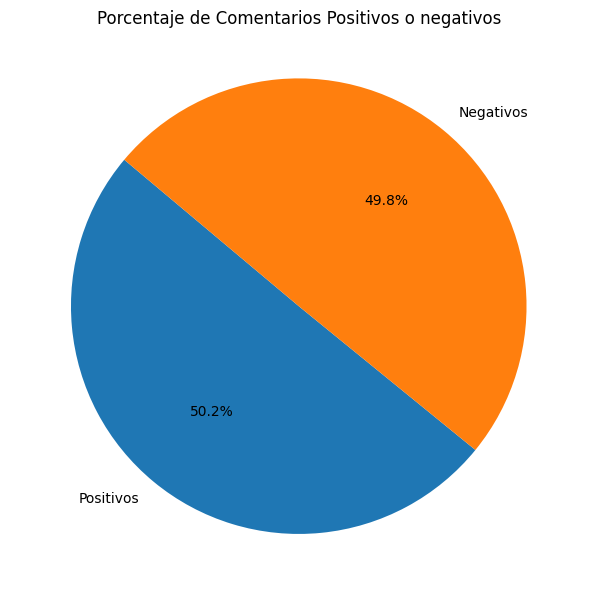

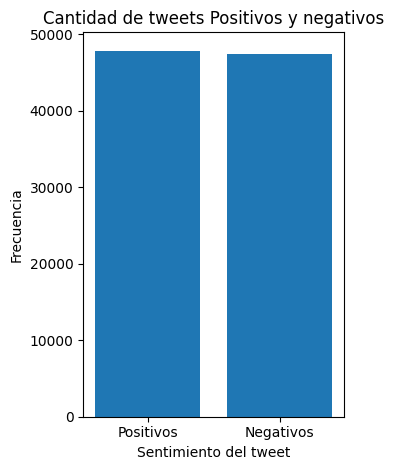

In [55]:
# Se grafica la distrinucion de las etiquetas

etiquetas = ["Positivos","Negativos"]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.pie(df['target'].value_counts() , labels=etiquetas, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Comentarios Positivos o negativos')
plt.axis('equal')
plt.tight_layout()
plt.show()


plt.subplot(1,2,2)
plt.bar(etiquetas, df['target'].value_counts())
plt.title("Cantidad de tweets Positivos y negativos")
plt.xlabel('Sentimiento del tweet')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Aqui se aprecia que los valores estan relativamente equilibrados intentando que no haya un posible sesgo en la clasificacion

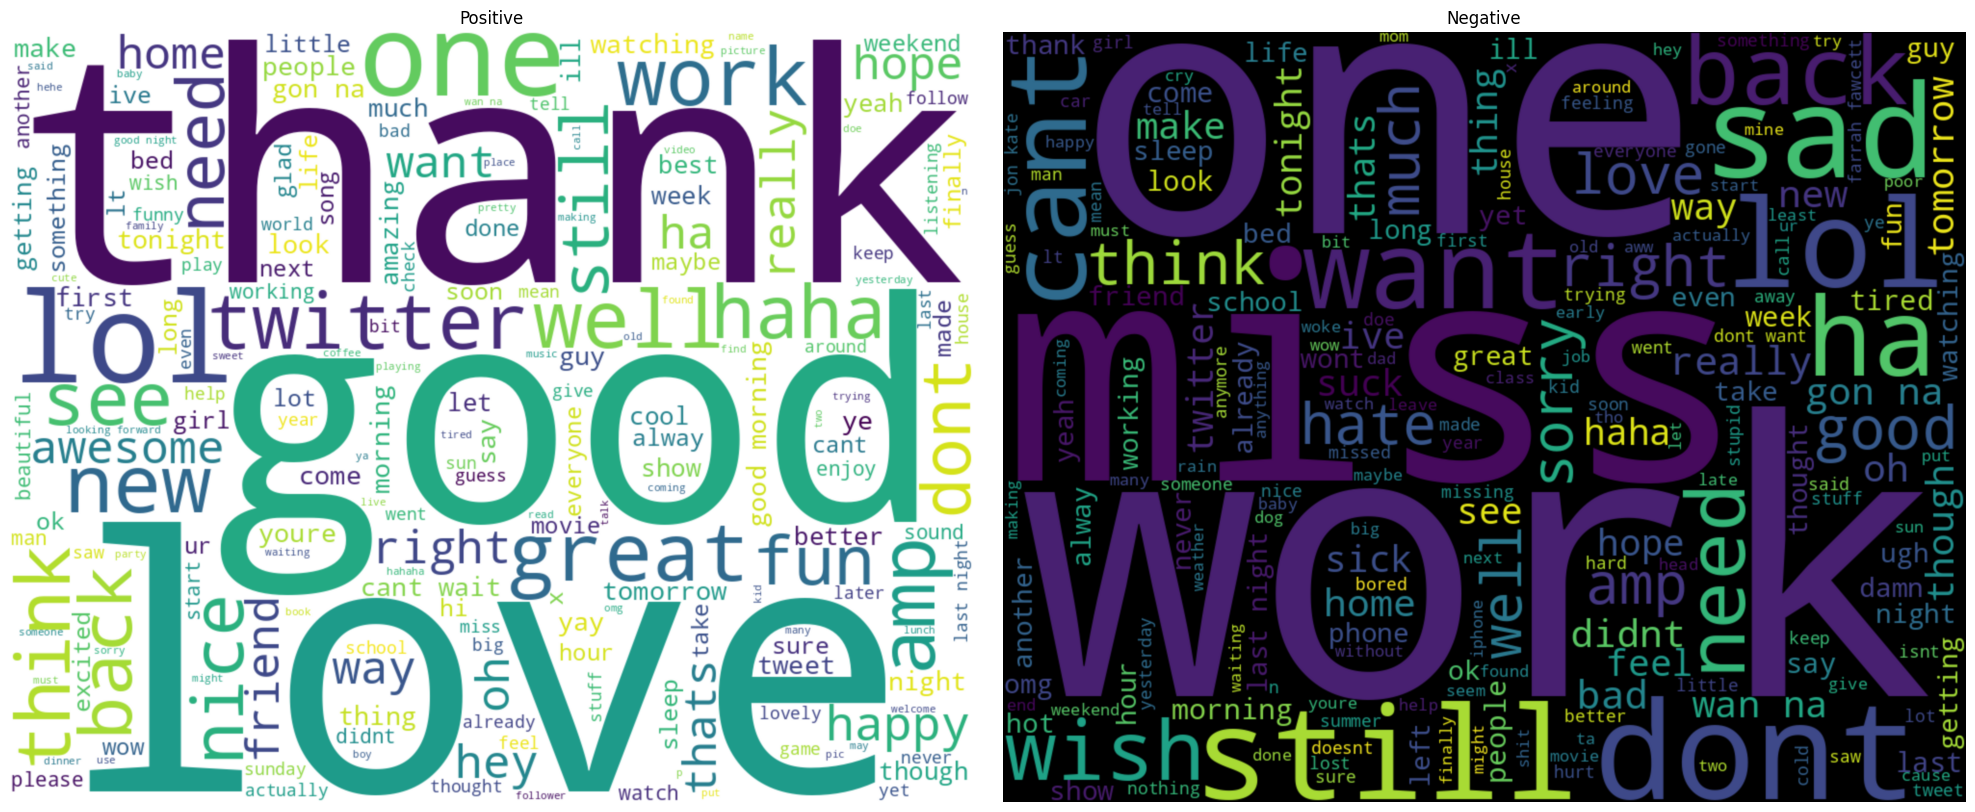

In [56]:
#Se generamos una nube de palabras segun los diferentes tipos de comentarios clasificados, primero los positivos

positive = " ".join(review for review in positivos.text_procesado)
negative = " ".join(review for review in negativos.text_procesado)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
wordcloud_1=WordCloud(height=800,width=1000,background_color='white',random_state=42).generate(positive)
plt.imshow(wordcloud_1,interpolation='bicubic')
plt.title("Positive")
plt.axis("off")

plt.subplot(1,2,2)
wordcloud_2=WordCloud(height=800,width=1000,background_color='black',random_state=42).generate(negative)
plt.imshow(wordcloud_2,interpolation='bicubic')
plt.title("Negative")

plt.axis("off")
plt.tight_layout()
plt.show()

Como se aprecia en las nubes de palabras, estan las palabras que mas se repiten dentro de los diferentes grupos positivos y negativos:

 Dentro de los positivos las palabras mas destacables que no son verbos, son:
  - thank
  - love
  - good
  - lol

Dentro de los negativos las palabras mas destacables que no son verbos, son:
 - work
 - miss
 - sad
 - dont

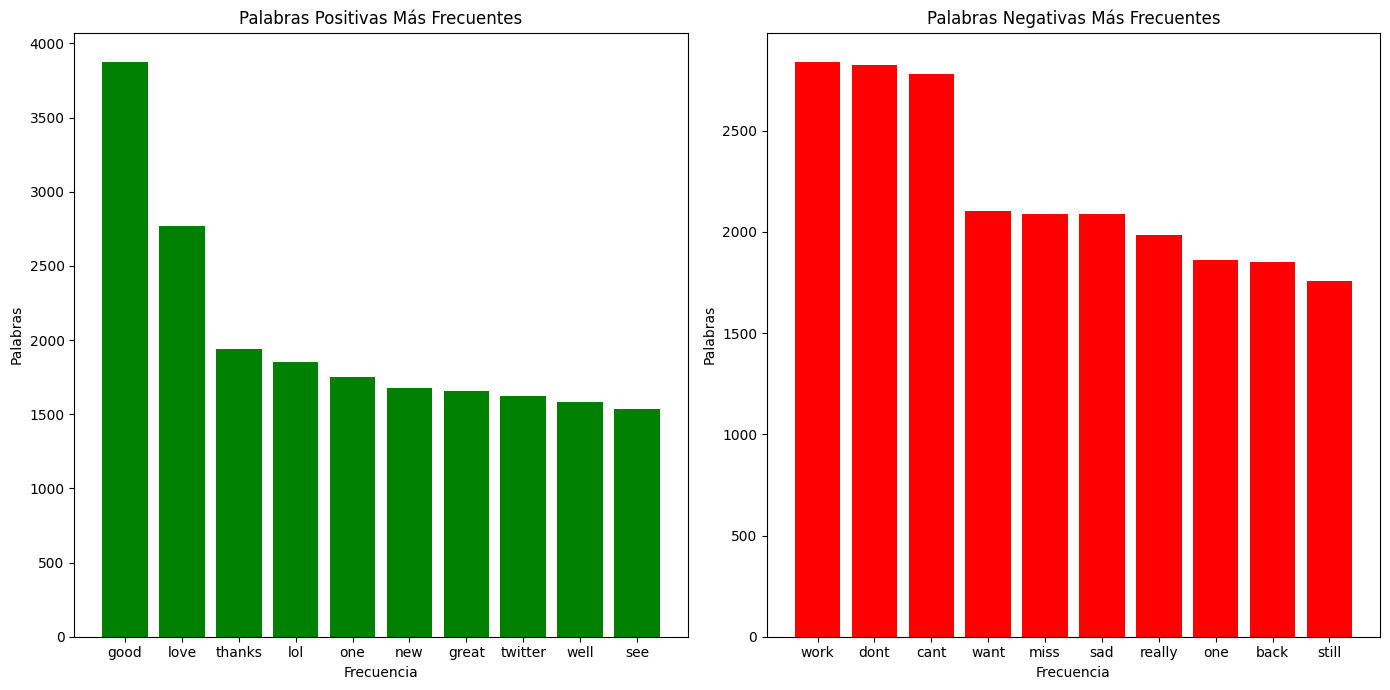

In [57]:
contador_positivos, cantidad_palabras_positivas = contar_palabras(positivos["text_procesado"])
contador_negativos, cantidad_palabras_negativas = contar_palabras(negativos["text_procesado"])

palabras_mas_comunes_positivas = contador_positivos.most_common(10)
palabras_mas_comunes_negativas = contador_negativos.most_common(10)

palabras_positivas, frecuencias_positivas = zip(*palabras_mas_comunes_positivas)
palabras_negativas, frecuencias_negativas = zip(*palabras_mas_comunes_negativas)

# Crear una figura y dos subplots
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1)

plt.bar(palabras_positivas, frecuencias_positivas, color='green')
plt.title('Palabras Positivas Más Frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')

# Gráfica de barras para palabras negativas
plt.subplot(1,2,2)
plt.bar(palabras_negativas, frecuencias_negativas, color='red')
plt.title('Palabras Negativas Más Frecuentes')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.tight_layout()

# Mostrar las gráficas
plt.show()


En este grafico de barras se puede apreciar las palabras con mas frecuencias encontradas, tanto para los target Positivos y los negativos, de esta manera podemos saber que palabras se repiten en ambos grupos, buscando de esa manera palabras que quizas no entregen informacion positiva ni negativa para agragarlas a los stop_words y dejar los comentarios con palabras que lo describan mas positiva o negativamente

In [58]:
print("La cantidad maxima de palabras negativas son:" + str(negativos["text"].apply(lambda x: len(x.split(" "))).max()))
print("La cantidad maxima de palabras positivas son:" + str(positivos["text"].apply(lambda x: len(x.split(" "))).max()))

La cantidad maxima de palabras negativas son:58
La cantidad maxima de palabras positivas son:45


Saber la cantidad maxima de palabras nos viene bien para saber cuantos vectores usar el los embedings

In [59]:
#Definimos las variables dependientes e independientes y las dividimos en las entradas de entrenamiento y de prueba
#Se definen las variables independientes y dependientes y se cambia su tipo de dato para su tratamiento

X, y = df["text"], df["target"].values
X = X.astype(str)
y = y.astype("float32")

In [78]:
#Realizamos la vectorizacion de los textos, con Tfidf y word2vec, para realizar pruebas y ver el que da mejor precision
#El primero de ellos es Tfidf

vectorizador = TfidfVectorizer(token_pattern=r'\b\w+\b', min_df=15)

Xtf = vectorizador.fit_transform(X)#X para los modelos de Tfidf

#El segundo es Word2vec

def generador_tokens(text): # Se convierten los textos en tokens para proder procesarlas en el modelo de Word2Vec
  tokens = nltk.word_tokenize(text)
  return tokens

tokens = X.apply(generador_tokens)

modelw = Word2Vec(sentences = tokens, min_count= 15, vector_size= 58)#Se setea el vectorizado de emmbedings

def get_vector(tokens):
    tokens = [token for token in tokens if token in modelw.wv.key_to_index]# Filtrar palabras que no están en el vocabulario del modelo
    if len(tokens) == 0:
        return np.zeros(modelw.vector_size)
    else:
        return np.mean([modelw.wv[token] for token in tokens], axis=0)


Xwv = tokens.apply(get_vector) # Aplicar la función para obtener los vectores de cada documento
Xwv = np.vstack(Xwv.values) #X para los modelos de Word2vec

In [80]:
Xwv.shape

(95218, 58)

En este caso se han seleccionado Tfidf y Word2Vec, porque Tfidf considera la totalidad de textos y la cantidad de palabras totales para generar sus vectores,  para el caso de Word2Vec porque considera el contexto de las palabras. Es decir que estos generan vectores mas complejos y por lo tanto buscan relaciones entre las palabras mas especificos, lo que con los modelos pueden tener mas sencillo la diferenciacion del sentimiento del texto.

In [82]:
#Se escalan los datos para lograr valores mas estandares para los vectores de TFIDF
#scaler = StandardScaler(with_mean=False)
scaler = MaxAbsScaler()
Xv = scaler.fit_transform(Xtf)

#Se escalan los datos para lograr valores mas estandares para los vectores de Emmbedings
#scalerWv = StandardScaler(with_mean=False)
scalerwv = MinMaxScaler()
Xwv = scalerwv.fit_transform(Xwv)

En este caso, debido a las pruebas realizadas con distintos escaladores, el MaxabsScaler fue el que dio mejores resultados, debido a que mantiene los valores de manera positiva lo que para los modelos tienden a considerar mejor la relacion entre las palabras ingresadas.

In [83]:
#Luego de realizar los tokens se procede a dividir en entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(Xv, y, test_size=0.2, random_state=42)

X_trainWv, X_testWv, y_trainWv, y_testWv = train_test_split(Xwv, y, test_size=0.2, random_state=42)

print("Tamaños de data de TFIDF\n")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print("\nTamaños de data de W2V\n")
print(X_trainWv.shape)
print(y_trainWv.shape)
print(X_testWv.shape)
print(y_testWv.shape)

Tamaños de data de TFIDF

(76174, 4874)
(76174,)
(19044, 4874)
(19044,)

Tamaños de data de W2V

(76174, 58)
(76174,)
(19044, 58)
(19044,)


Primer modelo, LogisticRegression con TFIDF

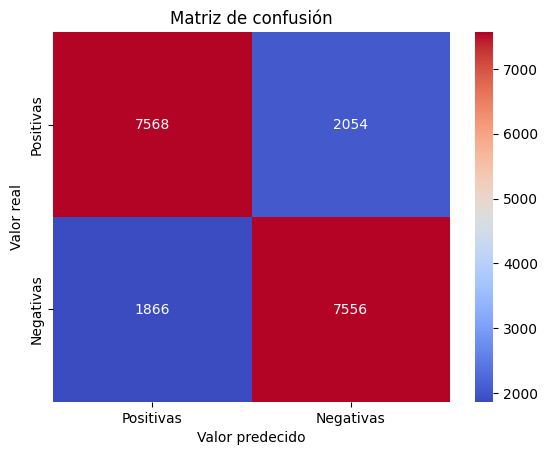


La precision del modelo es: 0.7941608905692081



In [85]:
#Se entrena y prueba el modelo entrenado, en este caso el primero es un regresion logistica

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#Realizamos las prediciones para los valores X de testeo

Predicciones_0 = model.predict(X_test)

# Se crea la matriz de confusion y se calcula la presicion del modelo

Cf_0 = confusion_matrix(y_test,Predicciones_0)
Precision_0 = accuracy_score(y_test,Predicciones_0)

#Graficamos el mapa de calor

sns.heatmap(Cf_0, annot= True, fmt= '.0f', cmap= 'coolwarm', xticklabels=["Positivas","Negativas"], yticklabels=["Positivas","Negativas"])
plt.title('Matriz de confusión')
plt.xlabel('Valor predecido')
plt.ylabel('Valor real')
plt.show()

#Imprimimos la precision y posteriormente graficaremos la matriz de confusion

print("")
print(f"La precision del modelo es: {Precision_0}\n")

En esta caso la matriz de confusion nos presenta la cantidad de tweets Positivos que fueron etiquetados correctamente (7568) e incorrectamente(2054)
como tambien los Negativos que fueron etiquetados correctamente (7556)e incorrectamente (1866), al tener valores similiares tanto en los etiquetados correctamente e incorrectamente comparando los positivos con negativos, se aprecia un relativo equilibrio a la hora de etiquetarlos. aunque la presicion no es suficientmente alta, es bastante mejorable

Ahora el entrenamiendo con Tfidf, y Kneighbors = 10 (este valor fue realizando diferentes pruebas)

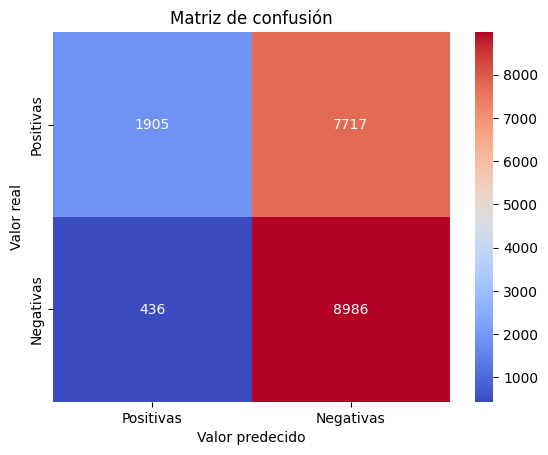


La precision del modelo es: 0.5718861583700903



In [86]:
#Se entrena el modelo de regresion logistica con las datos de entrenamiento

model1= KNeighborsClassifier(n_neighbors= 10)
model1.fit(X_train, y_train)

#Realizamos las prediciones para los valores X de testeo

Predicciones_1 = model1.predict(X_test)

# Se crea la matriz de confusion y se calcula la presicion del modelo

Cf_1 = confusion_matrix(y_test,Predicciones_1)
Precision_1 = accuracy_score(y_test,Predicciones_1)

#Graficamos el mapa de calor

sns.heatmap(Cf_1, annot= True, fmt= '.0f', cmap= 'coolwarm', xticklabels=["Positivas","Negativas"], yticklabels=["Positivas","Negativas"])
plt.title('Matriz de confusión')
plt.xlabel('Valor predecido')
plt.ylabel('Valor real')
plt.show()

#Imprimimos la precision y posteriormente graficaremos la matriz de confusion

print("")
print(f"La precision del modelo es: {Precision_1}\n")

En esta caso la matriz de confusion nos presenta la cantidad de tweets Positivos que fueron etiquetados correctamente (1905) e incorrectamente(7717)
como tambien los Negativos que fueron etiquetados correctamente (8986)e incorrectamente (436), en este caso los valores son baste distintos al compararlos, se ve y aprecia claramente que el modelo tiene una tendencia bastante grande en etiquetar los tweets como negativos, lo que un sesgo bastante inconveniente, ademas claro de su baja presicion.

Ahora el entrenamiendo con Tfidf, y MultinomialNB

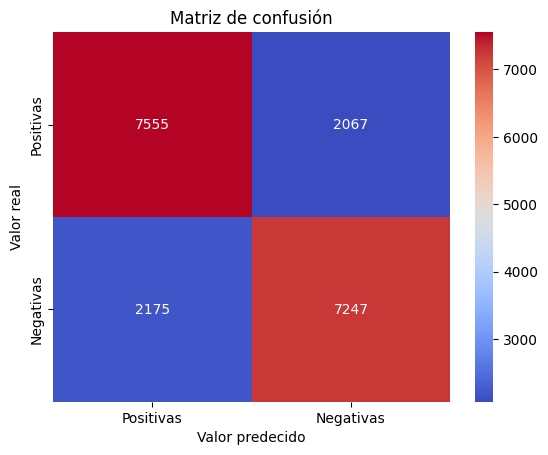


La precision del modelo es: 0.7772526780088217



In [87]:
#Se entrena el modelo de regresion logistica con las datos de entrenamiento
model3 = MultinomialNB()
model3.fit(X_train, y_train)

#Realizamos las prediciones para los valores X de testeo

Predicciones_2 = model3.predict(X_test)

# Se crea la matriz de confusion y se calcula la presicion del modelo

Cf_2 = confusion_matrix(y_test,Predicciones_2)
Precision_2 = accuracy_score(y_test,Predicciones_2)

#Graficamos el mapa de calor

sns.heatmap(Cf_2, annot= True, fmt= '.0f', cmap= 'coolwarm', xticklabels=["Positivas","Negativas"], yticklabels=["Positivas","Negativas"])
plt.title('Matriz de confusión')
plt.xlabel('Valor predecido')
plt.ylabel('Valor real')
plt.show()

#Imprimimos la precision y posteriormente graficaremos la matriz de confusion

print("")
print(f"La precision del modelo es: {Precision_2}\n")

En esta caso la matriz de confusion nos presenta la cantidad de tweets Positivos que fueron etiquetados correctamente (7555) e incorrectamente(2067)
como tambien los Negativos que fueron etiquetados correctamente (7247)e incorrectamente (2175), al tener valores similiares tanto en los etiquetados correctamente e incorrectamente comparando los positivos con negativos, se aprecia un relativo equilibrio a la hora de etiquetarlos. aunque la presicion no es suficientmente alta, es bastante mejorable, pero no es mejor que la del primer modelo

Ahora el entrenamiendo con word2vec o emmbedings, y LogisticRegression

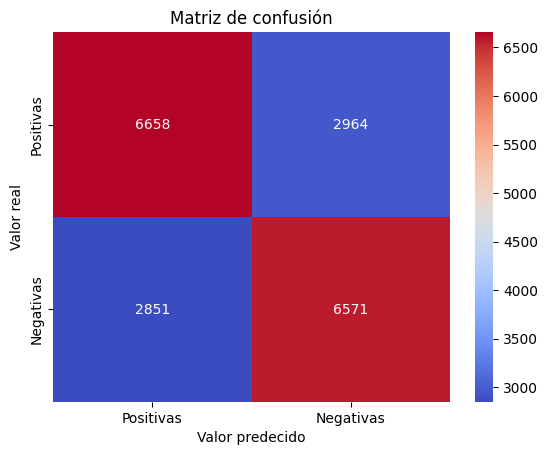


La precision del modelo es: 0.6946544843520269



In [88]:
#Se entrena y prueba el modelo entrenado, en este caso el primero es un regresion logistica

model4 = LogisticRegression(max_iter=1000)
model4.fit(X_trainWv, y_trainWv)

#Realizamos las prediciones para los valores X de testeo

Predicciones_3 = model4.predict(X_testWv)

# Se crea la matriz de confusion y se calcula la presicion del modelo

Cf_3 = confusion_matrix(y_testWv,Predicciones_3)
Precision_3 = accuracy_score(y_testWv,Predicciones_3)

#Graficamos el mapa de calor

sns.heatmap(Cf_3, annot= True, fmt= '.0f', cmap= 'coolwarm', xticklabels=["Positivas","Negativas"], yticklabels=["Positivas","Negativas"])
plt.title('Matriz de confusión')
plt.xlabel('Valor predecido')
plt.ylabel('Valor real')
plt.show()

#Imprimimos la precision y posteriormente graficaremos la matriz de confusion

print("")
print(f"La precision del modelo es: {Precision_3}\n")

En esta caso la matriz de confusion nos presenta la cantidad de tweets Positivos que fueron etiquetados correctamente (6658) e incorrectamente(2964)
como tambien los Negativos que fueron etiquetados correctamente (6571)e incorrectamente (2851), al tener valores similiares tanto en los etiquetados correctamente e incorrectamente comparando los positivos con negativos, se aprecia un relativo equilibrio a la hora de etiquetarlos. aunque la presicion no es suficientmente alta, es bastante mejorable, pero no es mejor que la del primer modelo

Ahora el entrenamiendo con word2vec o emmbedings, y KNeighbors = 100 (Realizando pruebas es el mas aceptable probado)

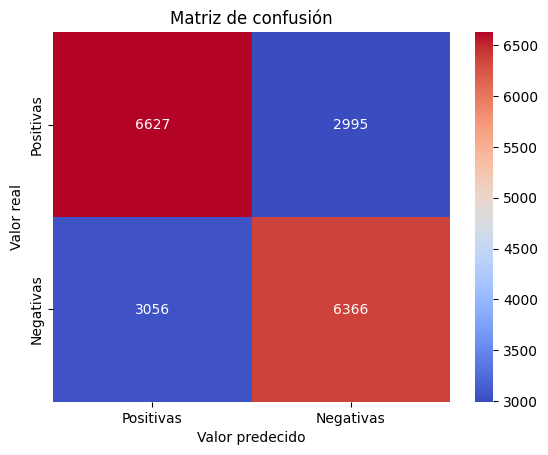


La precision del modelo es: 0.6822621298046628



In [89]:
#Se entrena el modelo de regresion logistica con las datos de entrenamiento

model5= KNeighborsClassifier(n_neighbors=100)
model5.fit(X_trainWv, y_trainWv)

#Realizamos las prediciones para los valores X de testeo

Predicciones_4 = model5.predict(X_testWv)

# Se crea la matriz de confusion y se calcula la presicion del modelo

Cf_4 = confusion_matrix(y_testWv,Predicciones_4)
Precision_4 = accuracy_score(y_testWv,Predicciones_4)

#Graficamos el mapa de calor

sns.heatmap(Cf_4, annot= True, fmt= '.0f', cmap= 'coolwarm', xticklabels=["Positivas","Negativas"], yticklabels=["Positivas","Negativas"])
plt.title('Matriz de confusión')
plt.xlabel('Valor predecido')
plt.ylabel('Valor real')
plt.show()

#Imprimimos la precision y posteriormente graficaremos la matriz de confusion

print("")
print(f"La precision del modelo es: {Precision_4}\n")

En esta caso la matriz de confusion nos presenta la cantidad de tweets Positivos que fueron etiquetados correctamente (6627) e incorrectamente(2995)
como tambien los Negativos que fueron etiquetados correctamente (6366)e incorrectamente (3056), al tener valores similiares tanto en los etiquetados correctamente e incorrectamente comparando los positivos con negativos, se aprecia un relativo equilibrio a la hora de etiquetarlos. aunque la presicion no es suficientmente alta, es bastante mejorable, en este caso de KN, no se muestra el sesgo anterior con el vectorizado TFIDF, lo que muestra una gran mejoria, pero aun asi no es mejor que el primer modelo.

Ahora el entrenamiendo con word2vec o emmbedings y DecisionTreeClassifier, para probar mas modelos

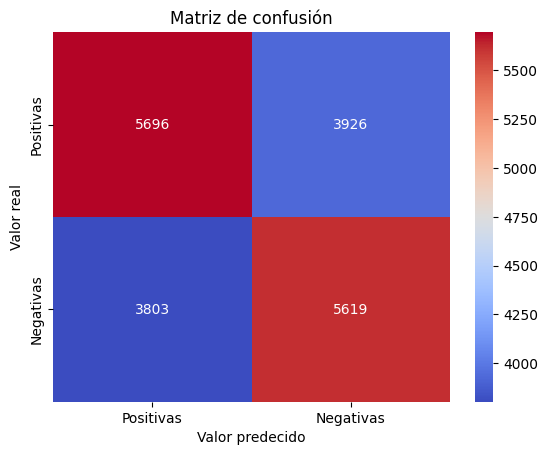


La precision del modelo es: 0.5941503885738291



In [90]:
#Se entrena el modelo de regresion logistica con las datos de entrenamiento

model6= DecisionTreeClassifier()
model6.fit(X_trainWv, y_trainWv)

#Realizamos las prediciones para los valores X de testeo

Predicciones_5 = model6.predict(X_testWv)

# Se crea la matriz de confusion y se calcula la presicion del modelo

Cf_5 = confusion_matrix(y_testWv,Predicciones_5)
Precision_5 = accuracy_score(y_testWv,Predicciones_5)

#Graficamos el mapa de calor

sns.heatmap(Cf_5, annot= True, fmt= '.0f', cmap= 'coolwarm', xticklabels=["Positivas","Negativas"], yticklabels=["Positivas","Negativas"])
plt.title('Matriz de confusión')
plt.xlabel('Valor predecido')
plt.ylabel('Valor real')
plt.show()

#Imprimimos la precision y posteriormente graficaremos la matriz de confusion

print("")
print(f"La precision del modelo es: {Precision_5}\n")

En esta caso la matriz de confusion nos presenta la cantidad de tweets Positivos que fueron etiquetados correctamente (5696) e incorrectamente(3926)
como tambien los Negativos que fueron etiquetados correctamente (5619)e incorrectamente (3803), al tener valores similiares tanto en los etiquetados correctamente e incorrectamente comparando los positivos con negativos, se aprecia un relativo equilibrio a la hora de etiquetarlos. aunque la presicion no es suficientmente alta, es bastante mejorable, pero no es mejor que la del primer modelo

Ahora en la sigueinte tabla se pueden comparar mejor los resultados de la presicion de cada modelo

In [70]:
#Analizamos la presicion de distintos modelos

modelos = ['Tfidf_Lr', 'Tfidf_Kn', 'Tfidf_Mb', 'W2V_Lr', 'W2V_Kn', 'W2V_Dtr']

# Precisiones de los modelos (ejemplo)
precisiones = [Precision_0, Precision_1, Precision_2, Precision_3, Precision_4, Precision_5]

# Crear el DataFrame
df_precisiones = pd.DataFrame({
    'Modelo': modelos,
    'Precisión': precisiones
})


In [91]:
df_precisiones

Modelo  Precisión
0  Tfidf_Lr   0.794161
1  Tfidf_Kn   0.571886
2  Tfidf_Mb   0.777253
3    W2V_Lr   0.672915
4    W2V_Kn   0.680634
5   W2V_Dtr   0.597984

Como se puede apreciar en la tabla superior, los modelos que tiene mayor presicion son Tfidf_Lr para el vectorizador Tfidf y W2V_Kn	para el vectorizado de Word2Vec, Estos seran los utilizados para hacer las pruebas de sentimiento

In [92]:
#Prueba con el primer modelo con una texto negativo

texto_0 = "It's been a pitiful day, it's complicated to achieve your dreams, I think I'm going to go to sleep."
texto_procesado_0 = preproceso_text(texto_0)
texto_0 = vectorizador.transform([texto_procesado_0])
texto_0 = scaler.transform(texto_0)
prediccion_1 = model.predict(texto_0)

if prediccion_1 == 1:
    print("El sentimiento para el texto ingresado es: Positivo")
else:
    print("El sentimiento para el texto ingresado es: Negativo")

El sentimiento para el texto ingresado es: Negativo


In [93]:
#Prueba con el primer modelo con una texto positivo

texto_1 = "I love this song because i love country music"
texto_procesado_1 = preproceso_text(texto_1)
texto_1 = vectorizador.transform([texto_procesado_1])
texto_1 = scaler.transform(texto_1)
prediccion_2 = model.predict(texto_1)

if prediccion_2 == 1:
    print("El sentimiento para el texto ingresado es: Positivo")
else:
    print("El sentimiento para el texto ingresado es: Negativo")

El sentimiento para el texto ingresado es: Positivo


In [94]:
#Prueba con el primer mejor modelo con una texto positivo

texto_3 = "I like this song :D"
texto_procesado_3 = preproceso_text(texto_3)
texto_3 = vectorizador.transform([texto_procesado_3])
texto_3 = scaler.transform(texto_3)
prediccion_3 = model.predict(texto_3)

if prediccion_3 == 1:
    print("El sentimiento para el texto ingresado es: Positivo")
else:
    print("El sentimiento para el texto ingresado es: Negativo")

El sentimiento para el texto ingresado es: Positivo


In [95]:
#Prueba con el segundo mejor modelo con una texto negativo w2v

texto_4 = "It's been a pitiful day, it's complicated to achieve your dreams, I think I'm going to go to sleep."
texto_4 = generador_tokens(texto_4)
texto_4 = get_vector(texto_4) # Aplicar la función para obtener los vectores del texto 4

if isinstance(texto_4, list):
    texto_4 = np.mean(texto_4, axis=0)

# Redimensionar el vector para que sea compatible con el scaler y el modelo
texto_4 = texto_4.reshape(1, -1)
texto_4 = scalerwv.transform(texto_4)

prediccion_4 = model5.predict(texto_4)

if prediccion_4 == 1:
    print("El sentimiento para el texto ingresado es: Positivo")
else:
    print("El sentimiento para el texto ingresado es: Negativo")

El sentimiento para el texto ingresado es: Negativo


In [96]:
##Prueba con el segundo mejor modelo con una texto Positivo w2v

texto_5 = "I love this song because, i love country music"
texto_5 = generador_tokens(texto_5)
texto_5 = get_vector(texto_5) # Aplicar la función para obtener los vectores del texto 4
if isinstance(texto_5, list):
    texto_5 = np.mean(texto_5, axis=0)

# Redimensionar el vector para que sea compatible con el scaler y el modelo
texto_5 = texto_5.reshape(1, -1)
texto_5 = scalerwv.transform(texto_5)
prediccion_5 = model5.predict(texto_5)

if prediccion_5 == 1:
    print("El sentimiento para el texto ingresado es: Positivo")
else:
    print("El sentimiento para el texto ingresado es: Negativo")

El sentimiento para el texto ingresado es: Negativo


In [97]:
#Prueba con el segundo mejor modelo con una texto Positivo w2v

texto_6 = "I like this song :D"
texto_6 = generador_tokens(texto_6)
texto_6 = get_vector(texto_6) # Aplicar la función para obtener los vectores del texto 4
if isinstance(texto_6, list):
    texto_6 = np.mean(texto_6, axis=0)
texto_6 = texto_6.reshape(1, -1)# Redimensionar el vector para que sea compatible con el scaler y el modelo
texto_6 = scalerwv.transform(texto_6)
prediccion_6 = model6.predict(texto_6)

texto_6 = scalerwv.transform(texto_6)
prediccion_6 = model5.predict(texto_6)

if prediccion_6 == 1:
    print("El sentimiento para el texto ingresado es: Positivo")
else:
    print("El sentimiento para el texto ingresado es: Negativo")

El sentimiento para el texto ingresado es: Negativo


Como se puede apreciar, al probar los modelos han acertado por lo menos en los textos escritos, para ver mas su presicion habria que hacer aun mas pruebas. Pero en base a lo necesitado el mejor modelo entrenado es modelo con vectorizacion TFIDF y LogisticRegression, Logrando una eficiencia del casi 80%, y es bastante mejora con un mayor analisis en el procesamiento de los textos.